# 32931 Technology Research Methods (SPRING 2019)
Quantitative Lab 3
(using PYTHON)

Compiled by Mahrita Harahap

# ANOVA Test

These questions have been taken from P. Petocz, Statistical laboratory exercises using Minitab: a guide to understanding data, Jacaranda Wiley, 1998.

Flicker Rates

An individual's critical flicker frequency is the highest frequency at which the flicker in a flickering light source can be detected. At frequencies above the critical frequency, the light source appears to be continuous even though it is actually flickering. This investigation recorded critical flicker frequency and iris colour of the eye for 19 subjects. These results were published in “The effect of iris color on critical flicker frequency”. Journal of General Psychology (1973), 91-95.

Read in the data set Flicker.csv. Obtain a multiple boxplot and numerical summaries of the critical frequency for each of the three iris colours using boxplot and by functions. Summarise your observations.


In [1]:
import pandas as pd

flicker = pd.read_csv('C:/Users/mahrita/Google Drive/32931 TRM/32931 Spring 2018/Week 3/Flicker.csv')
flicker
flicker.groupby(['Colour']).describe().unstack()
#Summary statistics

                Colour
Flicker  count  1          8.000000
                2          5.000000
                3          6.000000
         mean   1         25.587500
                2         26.920000
                3         28.166667
         std    1          1.365323
                2          1.843095
                3          1.527962
         min    1         23.700000
                2         24.200000
                3         25.700000
         25%    1         24.725000
                2         26.400000
                3         27.475000
         50%    1         25.350000
                2         26.900000
                3         28.400000
         75%    1         26.425000
                2         28.000000
                3         29.175000
         max    1         27.900000
                2         29.100000
                3         29.900000
dtype: float64

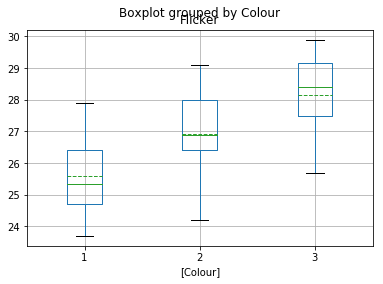

In [2]:
import matplotlib.pyplot as plt

# Multiple Boxplots
flicker.boxplot(by='Colour', meanline=True, showmeans=True, showcaps=True,showbox=True, showfliers=False)
plt.show()

It appears that people with blue eyes have the highest critical frequency (mean = 28.2), followed by those with green eyes (mean = 26.9), and then brown eyes (mean = 25.6). It also appears that the three groups have similar variation in the critical frequencies observed. 

Since there are more than 2 groups, if we wanted to compare the means between the groups we should undertake a one-way ANOVA test. Remember that the ANOVA test has three assumptions.
1. normality of group observations (K-S test on each group)
2. normality of residuals (K-S test on the residuals)
3. and equality of variances (Levene’s test)

Test whether each group has normally distributed observations formally by using the Kolmogorov Smirnov test. Include the null and alternative hypothesis, p-value, decision and conclusion in your answer. Is analysis of variance appropriate in this case?


In [12]:
import statsmodels.api as sm

# normality of group observations (K-S test on each group)
print('lilliefors Bl:  D , P_Value',sm.stats.diagnostic.lilliefors(flicker['Flicker'][flicker.Colour==1], pvalmethod='table'))
print('lilliefors Gr:  D , P_Value',sm.stats.diagnostic.lilliefors(flicker['Flicker'][flicker.Colour==2], pvalmethod='table'))
print('lilliefors Br:  D , P_Value',sm.stats.diagnostic.lilliefors(flicker['Flicker'][flicker.Colour==3], pvalmethod='table'))



lilliefors Bl:  D , P_Value (0.16651167904224429, 0.20000000000000001)
lilliefors Gr:  D , P_Value (0.18892034589128653, 0.20000000000000001)
lilliefors Br:  D , P_Value (0.20143512793292812, 0.20000000000000001)


For each group,

H0: The data is normally distributed<br>
H1: The data is not normally distributed<br>

p-value > α(0.05) we do not reject H0. We conclude that the critical frequencies for each colour group do not deviate significantly from normally distributed data.<br>

We have met one of the assumptions for ANOVA.


Test whether the residuals are normally distributed. Include the null and alternative hypothesis, p-value, decision and conclusion in your answer. Is analysis of variance appropriate in this case?

In [14]:
import patsy as ps
from statsmodels.formula.api import ols

y, X = ps.dmatrices('Flicker ~ Colour',data = flicker, return_type = 'dataframe')
model = sm.OLS(y, X)
results = model.fit()
print('lilliefors:  D , P_Value',sm.stats.diagnostic.lilliefors(results.resid, pvalmethod='table'))

lilliefors:  D , P_Value (0.092694844343256921, 0.20000000000000001)


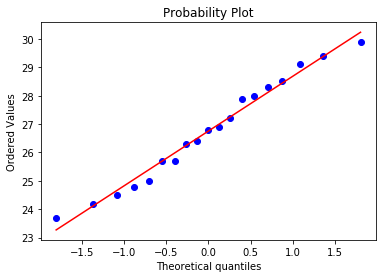

In [18]:
import pylab
from scipy import stats
stats.probplot(flicker['Flicker'], dist="norm", plot=pylab)
pylab.show()

H0: The residuals are normally distributed <br>
H1: The residuals are not normally distributed<br>
D=0.0927<br>
p-value = 0.2> α(0.05) we do not reject H0. We conclude that the residuals do not deviate significantly from normally distributed data.   

We have met another assumption for ANOVA.


Test the homogeneity of variances using the levene test. Is analysis of variance appropriate in this case?

In [27]:
# equality of variances (Levene’s test)
W2, pval2 = stats.levene(flicker['Flicker'][flicker.Colour==1],flicker['Flicker'][flicker.Colour==2],flicker['Flicker'][flicker.Colour==3], center='mean')
W2, pval2

(0.094211701909605941, 0.91059114657637386)

H0: The variances of the three groups are equal.<br>
H1: The variances of the three groups are not all equal.<br>

Since p-value = 0.9106> α(0.05) we do not reject H0, we can conclude that the variances of the critical frequencies are not significantly different between the iris colours. <br>

We have met the final assumption for ANOVA. It is appropriate to carry out an ANOVA because all three assumptions (normality of group observations, normality of residuals, and equality of variances) have been met.


Write down the null and alterative hypotheses and carry out a test for the equality of the group means (ANOVA test). What is the result of the test?

In [34]:
import patsy as ps
from statsmodels.formula.api import ols

model = ols('Flicker ~ Colour',flicker)
table = sm.stats.anova_lm(model.fit(), typ=2) 
print(table)

             sum_sq    df          F    PR(>F)
Colour    22.990536   1.0  10.200194  0.005318
Residual  38.316832  17.0        NaN       NaN


H0: μBlack = μGreen = μBrown<br>
H1: Not all μi are equal.<br>
p-value = 0.005 < α(0.05) therefore we reject H0. We conclude that there is a significant difference in the mean critical frequencies amongst the three different iris colours. 



# Multiple Comparisons Test

Recall that if we reject the null hypothesis in an analysis of variance, we can use a multiple comparisons test to determine where the differences lie. Use multicomp.pairwise_tukeyhsd function in Python to see between which groups are there significant differences? 

In [36]:
res2 = sm.stats.multicomp.pairwise_tukeyhsd (flicker['Flicker'], flicker['Colour'])
print (res2)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2     1.3325  -0.9429 3.6079 False 
  1      3     2.5792   0.4236 4.7347  True 
  2      3     1.2467  -1.1702 3.6636 False 
--------------------------------------------


Since 0 does not lie in the 95% confidence interval (or p-value=0.018 < 0.05), we conclude that there is a significant difference between the blue and brown eyes, but none of the other pairs of iris colours have significantly different mean critical frequencies.

# Nonparametric Equivalent: Kruskal-Wallis Test

Say if one of the three assumptions (normality of group observations, normality of residuals, and equality of variances) have not been met. Then the ANOVA test would not be appropriate. Then we should undertake the alternative equivalent nonparametric test, the Kruskal Wallis test.

In [53]:
flicker.loc[flicker['Colour'] == 1]

,Colour,Flicker
0,1,26.8
1,1,27.9
2,1,23.7
3,1,25.0
4,1,26.3
5,1,24.8
6,1,25.7
7,1,24.5


In [56]:
stats.kruskal(flicker.loc[flicker['Colour'] == 1].Flicker,flicker.loc[flicker['Colour'] == 2].Flicker,flicker.loc[flicker['Colour'] == 3].Flicker)

KruskalResult(statistic=7.1944029850746354, pvalue=0.027400295183181784)

H0: medBlack = medGreen = medBrown <br>
H1: Not all medians are equal. <br>
Test Statistic=7.1944 <br>
p-value = 0.027 < α(0.05) therefore we reject H0. We conclude that there is a significant difference in the median critical frequencies amongst the three different iris colours. 


# Independent 2-Sample T-Test

Crossbills data

On page 48 of the text Understanding data is a set of data on the lengths (in mm) of the left and right legs of a sample of common crossbills, some of them left-billed, some of them right-billed. The data were recorded to determine whether the method of feeding, i.e. the bill orientation, places more strain on one leg than the other.

Open the worksheet crossbill.csv to get the measurements. How do we know that the data are paired? 


In [3]:
crossbill = pd.read_csv('C:/Users/mahrita/Google Drive/32931 TRM/32931 Spring 2018/Week 3/crossbill.csv')
crossbill

,bird,lleg,rleg,bill
0,1,19.0,17.4,left
1,2,17.1,17.3,left
2,3,16.6,16.6,left
3,4,17.0,16.7,left
4,5,18.3,18.2,left
5,6,17.5,17.3,left
6,7,16.4,16.3,left
7,8,17.1,16.9,left
8,9,17.5,16.7,left
9,10,17.0,16.8,left


Each left leg length had a paired right leg length because each pair of legs belonged to a particular bird.<br>
Compute the differences between the left and right leg lengths using the numeric expression LLeg – Rleg. Obtain a boxplot of Diff to compare the left-billed crossbills and the right-billed crossbills  Write a brief summary of the information shown by this graph.

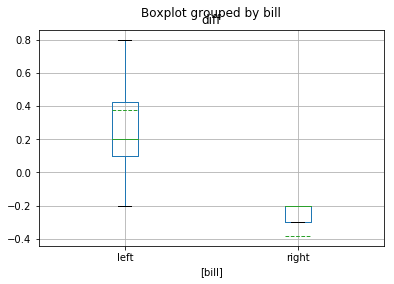

In [36]:
df=crossbill.copy()
df2 = df.assign(diff=crossbill['lleg']-crossbill['rleg'])
a=df2.loc[:, ['bill', 'diff']] 
#import matplotlib.pyplot as plt

# Multiple Boxplots
a.boxplot(by='bill', meanline=True, showmeans=True, showcaps=True,showbox=True, showfliers=False)
plt.show()

It appears that the difference is positive for left-billed crossbills, meaning their left leg is longer than their right leg. The difference looks slightly negative for right-billed crossbills, meaning their right leg is longer than their left leg. It also appears that, with the exception of three outliers, that the differences are less variable for right-billed crossbills than for the left-billed crossbills.

The first question to ask is whether the right and left legs of crossbills have significantly different lengths. Explain why this question must be answered for the two groups of crossbills separately. Then use a one-sample t test to test whether the mean is zero. Repeat this process for the right-billed birds. Why do we use H0 µ = 0 as the null hypothesis value? Should the alternative be one-sided or two-sided? What are your conclusions from the tests?

In [61]:
df3=df2.loc[df2['bill'] == 'left']

from scipy import stats
t_statistic, p_value =stats.ttest_1samp(df3['diff'], 0)
print("t_statistic, p_value",t_statistic, p_value)

t_statistic, p_value 2.48643279485 0.0302263636738


In [63]:
df4=df2.loc[df2['bill'] == 'right']

from scipy import stats
t_statistic, p_value =stats.ttest_1samp(df4['diff'], 0)
print("t_statistic, p_value",t_statistic, p_value)

t_statistic, p_value -3.1168131492 0.00980556863834


We need to consider the two groups separately, since we suspect that they might have different signs for the difference. If we combine the groups, then we lose useful information. We need to use μ = 0 as the null hypothesis since μ = 0 represents the left and right legs being of equal length (left –right = 0). We choose a 2-sided alternative since we do not really have enough information about which leg we expect to be longer for which billed crossbill. The legs of the crossbills have significantly different lengths, both for the left-billed crossbills (p-value = 0.03<α) and the right-billed crossbills (p-value = 0.0098<α).

Do the values of Diff show differences between the two groups of crossbills? Write down null and alternative hypotheses for the question. Is the alternative hypothesis one-sided or two-sided? Write down the p-value, decision and conclusion.

First we need to look at Levene’s test to see whether we should assume variances are equal or not.

In [64]:
# equality of variances (Levene’s test)
W2, pval2 = stats.levene(df3['diff'],df4['diff'], center='mean')
W2, pval2

(0.71297075703744484, 0.40754801323091527)

H0: σleft-billed  =  σright-billed <br>
H1: σleft-billed  ≠  σright-billed<br>
F-test=0.713<br>
p-value = 0.408 > α(0.05), we can assume that the variances for the two groups are not significantly different. So we can conduct a 2 sample t-test.


In [72]:
from scipy import stats
t_statistic, p_value =stats.ttest_ind(df3['diff'],df4['diff'], 0)
print("t_statistic, p_value",t_statistic, p_value)

t_statistic, p_value 3.89671195506 0.0007756308594


H0: μleft-billed  =  μright-billed <br>
H1: μleft-billed  ≠  μright-billed <br>
t-test=3.897<br>
p-value = 0.001< α(0.05) therefore we reject H0. We can conclude that there is a significant difference between the mean values of diff between the two groups of Crossbills.


# Nonparametric Equivalent: Mann-Whitney U Test

Test whether the two groups are normally distributed, include the null and alternative hypothesis, p-value, decision and conclusion in your answer. Was the two sample independent t-test appropriate in this case? If not, use the appropriate equivalent nonparametric test:

In [74]:
import statsmodels.api as sm
print('lilliefors:  D , P_Value',sm.stats.diagnostic.lilliefors(df3['diff'], pvalmethod='approx'))
print('lilliefors:  D , P_Value',sm.stats.diagnostic.lilliefors(df4['diff'], pvalmethod='approx'))

C:\Users\mahrita\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


lilliefors:  D , P_Value (0.30707377088208559, 0.0026390482843014658)
lilliefors:  D , P_Value (0.41087055076987766, 3.8568931758380838e-06)


H0: The data is normally distributed <br>
H1: The data is not normally distributed <br>
p-value = 0.0026< α(0.05) we  reject H0. We conclude that the mean difference of left billed Crossbills is not normally distributed.

H0: The data is normally distributed <br>
H1: The data is not normally distributed <br>
p-value = 0.000003< α(0.05) we  reject H0. We conclude that the mean difference of right-billed Crossbills is not normally distributed.
<br>

The equivalent nonparametric test to the independent t-test is the Mann Whitney test. Use the wilcox.test function in R.


In [77]:
stats.mannwhitneyu(df3['diff'],df4['diff'])

MannwhitneyuResult(statistic=3.0, pvalue=3.5482251140296239e-05)


H0: medianleft-billed  =  medianright-billed <br>
H1: medianleft-billed  ≠  medianright-billed <br>
p-value = 0.00003< α(0.05) therefore we reject H0. We can conclude that there is a significant difference between the median values of diff between the two groups of Crossbills.
 
